In [82]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [83]:
#import csv file
df = pd.read_csv('movies.csv')

In [137]:
#basic info

df.info

<bound method DataFrame.info of                                                    name  rating  genre  year  \
0                                           The Shining       7      6  1980   
1                                       The Blue Lagoon       7      1  1980   
2        Star Wars: Episode V - The Empire Strikes Back       5      0  1980   
3                                             Airplane!       5      4  1980   
4                                            Caddyshack       7      4  1980   
5                                       Friday the 13th       7     10  1980   
6                                    The Blues Brothers       7      0  1980   
7                                           Raging Bull       7      3  1980   
8                                           Superman II       5      0  1980   
9                                       The Long Riders       7      3  1980   
10                                Any Which Way You Can       5      0  1980   
11      

In [85]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [86]:
# Missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [87]:

df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [88]:
#Pulling out all of data in default
pd.set_option('display.max_rows',None)

In [89]:
#Filling the missing value with 0 and correcting movie released year
df = df.fillna(0)
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [135]:
df.sort_values(by=['gross'],inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0
7445,Avengers: Endgame,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0
3045,Titanic,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0
6663,Star Wars: Episode VII - The Force Awakens,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0
7244,Avengers: Infinity War,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0


In [134]:
#Drop any duplicates
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0
1,The Blue Lagoon,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0
2,Star Wars: Episode V - The Empire Strikes Back,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0
3,Airplane!,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0
4,Caddyshack,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0


<Axes: xlabel='genre'>

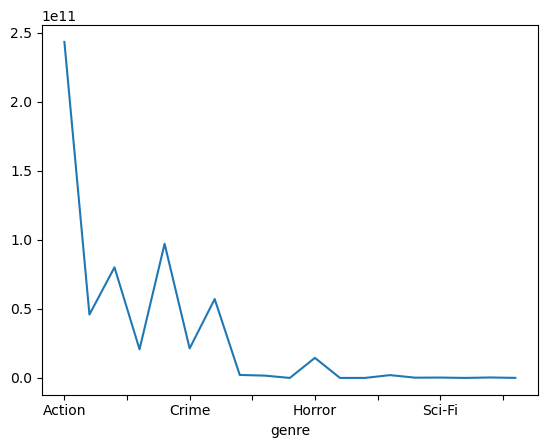

In [101]:
#Visualize the relationship between genre and gross by using pandas built-in visualization functions
genre_sum = df.groupby('genre').sum('gross')
genre_sum.head()
genre_sum['gross'].plot()


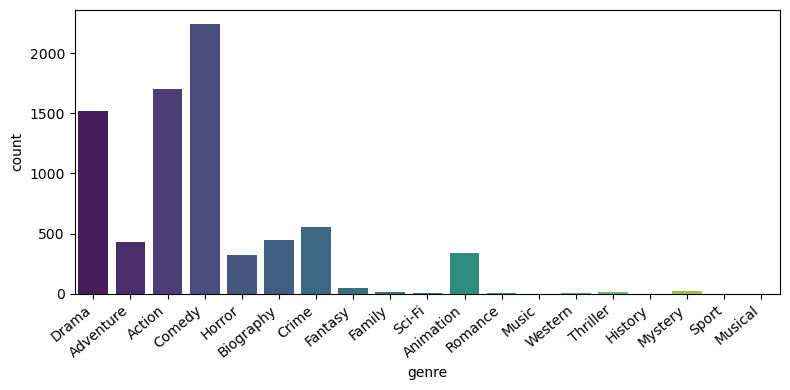

In [105]:
#create count plot for genre
plt.figure(figsize=(8,4))
ax = sns.countplot(x='genre',data=df,palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Gross Earnings')

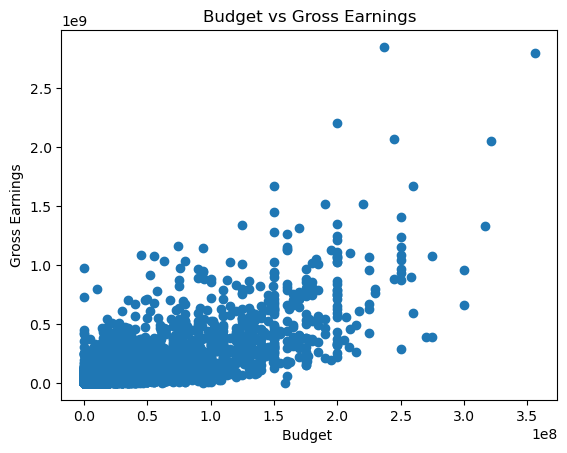

In [107]:
#Determine the factors which are highly correlated with gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget ')
plt.ylabel('Gross Earnings')

<Axes: xlabel='budget', ylabel='gross'>

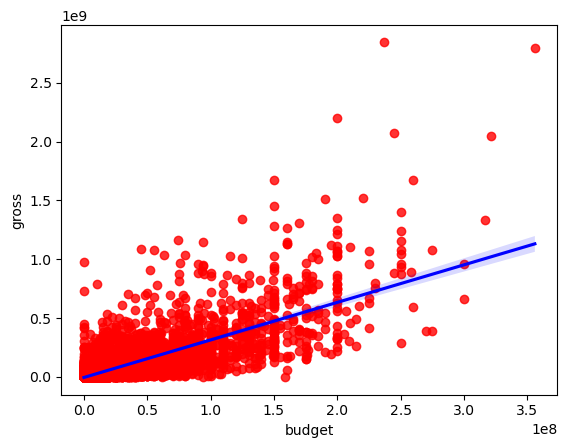

In [109]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y='gross', data = df, scatter_kws = {'color' : 'red'}, line_kws = {"color":"blue"})

In [110]:
# Let's start looking at correlation

In [112]:
df.corr(method = 'pearson') 

/var/folders/_t/mtl3f8d5449dr9ch_9vnytt40000gn/T/ipykernel_23386/886310742.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [113]:
df.corr(method = 'kendall')

/var/folders/_t/mtl3f8d5449dr9ch_9vnytt40000gn/T/ipykernel_23386/3622761649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390
score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601
votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697
budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184
gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429
runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000


In [114]:
df.corr(method = 'spearman')

/var/folders/_t/mtl3f8d5449dr9ch_9vnytt40000gn/T/ipykernel_23386/875244283.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


/var/folders/_t/mtl3f8d5449dr9ch_9vnytt40000gn/T/ipykernel_23386/2510276805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


Text(50.722222222222214, 0.5, 'Movie Features')

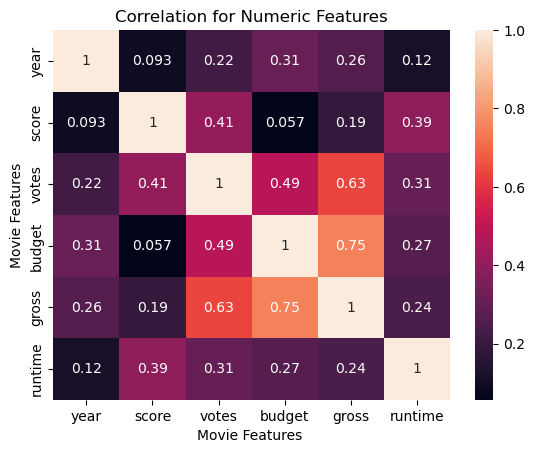

In [116]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation for Numeric Features')
plt.xlabel('Movie Features ')
plt.ylabel('Movie Features')

In [133]:
# Looks at the correlation between all features
#assigning numbers to different strings in different columns
df_categorized = df

for col_name in df_categorized.columns:
    if (df_categorized[col_name].dtype == 'object'):
        df_categorized[col_name] = df_categorized[col_name].astype('category')
        df_categorized[col_name] = df_categorized[col_name].cat.codes
        
df_categorized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0
1,The Blue Lagoon,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0
2,Star Wars: Episode V - The Empire Strikes Back,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0
3,Airplane!,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0
4,Caddyshack,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0


/var/folders/_t/mtl3f8d5449dr9ch_9vnytt40000gn/T/ipykernel_23386/3126020528.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_categorized.corr(method = 'pearson')


Text(120.72222222222221, 0.5, 'Movie Features')

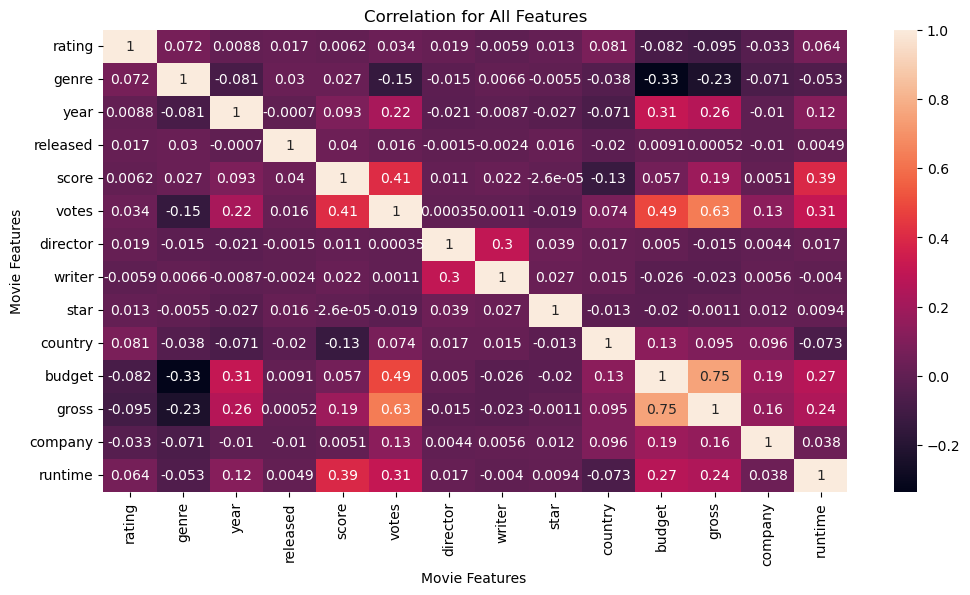

In [122]:
plt.figure(figsize=(12,6))
correlation_matrix = df_categorized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation for All Features')
plt.xlabel('Movie Features ')
plt.ylabel('Movie Features')

In [130]:
correlation_mat = df_categorized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

/var/folders/_t/mtl3f8d5449dr9ch_9vnytt40000gn/T/ipykernel_23386/1090427252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = df_categorized.corr()


rating  rating      1.000000
        genre       0.072423
        year        0.008779
        released    0.016613
        score       0.006192
dtype: float64

In [131]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.334021
genre   budget   -0.334021
gross   genre    -0.234297
genre   gross    -0.234297
votes   genre    -0.145296
dtype: float64

In [132]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr.head()

gross   votes     0.632870
votes   gross     0.632870
budget  gross     0.750157
gross   budget    0.750157
rating  rating    1.000000
dtype: float64